# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

To boost the state participation rate and increase the useage of SAT examination by understanding the various correlationships between participation rates, subject scoring and other intangible factors.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [37]:
import seaborn as sns
import scipy as sc                    ### What you're doing here is importing the scipy module under the alias 'sc', so
import numpy as np                    ### you can call the module without typing out 'scipy' in its entirety. I've never
import matplotlib.pyplot as plt       ### seen someone use 'sc' as an alias for scipy, most examples use 'sp'.
import random as ran
import pandas as pd
#Imports: Imports all my libraries used

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [38]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')
act_2018_updated = pd.read_csv('../data/act_2018_updated.csv')
#Reads everything

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [39]:
sat_2017.head(10)
sat_2018.head(10)
act_2018.head(10)
act_2017.head(10)
#Code: This prints out the first 10 rows of each dataframe

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The SAT gives the participation rates and the composite scores in each state, with some states having a 100% participation rate. The ACT gives the the participation rates and the individual component scores in each state, with some states having a 100% participation rate.



#### 4a. Does the data look complete? 

Answer: Yes, as every score and participation rate is filled for the sat and act for each state

In [40]:
### might want to use df.isnull().sum() to confirm

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 

ACT:

Maryland Science is wrong

Wyoming: Composite is wrong

SAT:

Maryland Math is wrong



The minimum/maximum possible SAT value is 400/1600, while the minimum/maximum possible ACT value is 1/36

As all data points fall within this range, there are no questionable values.



In [41]:
### I'm not sure if you manually checked each row, but a scalable solution would be to simply check the math that 
### they are doing. For example,

### cond = ~((df["Total"] - 1 ) <= (df["Math"] + df["Evidence-Based Reading and Writing"])) & ((df["Math"] + df["Evidence-Based Reading and Writing"]) <= (df["Total"] + 1))
### df[cond]

### cond is a list of booleans (True/False) which will immediately extract the rows where the math doesn't add up. 
### The +1 and -1 are necessary since they already do some rounding in the presented dataset.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [42]:
sat_2017.iat[20,3]  = 524             ### Good
act_2017.iat[21,5]  = 23.2
act_2017.iat[21,6]  = 23.6
act_2017.iat[51,6]  = 20.2
# Taking data from https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/ SAT
# Taking data from https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows ACT


#### 5. What are your data types? 
Display the data types of each feature. 

In [43]:
print(sat_2017.dtypes)
print(act_2017.dtypes)


State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 

SAT: 

The Participation should be float while it is a object.

ACT:

The Participation should be float while it is a object.

The Composite should be a float while it is a object.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [44]:
def change_columntype(data_frame, col_type = float, col = 'Participation'): ### Good
    data_frame[col] = data_frame[col].str.replace('%', '')
    data_frame[col] = data_frame[col].astype(col_type)
    

In [45]:
change_columntype(sat_2017)


In [46]:
change_columntype(act_2017, col = 'Composite')

In [47]:
change_columntype(act_2017)

- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [48]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [49]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [50]:
def change_columnnames(data_frame , name):
    save = []
    for i in data_frame.columns :
        if i != 'State':
            i = i.lower()
            i = i.replace(" ", "_")
            i = i + name
        save.append(i)
    data_frame.columns = save

In [51]:
change_columnnames(sat_2017, name = 'sat17')

In [52]:
change_columnnames(act_2017, name = 'act17')

In [53]:
sat_2017.iat[20,3]  = 524
act_2017.iat[21,5]  = 23.2
act_2017.iat[21,6]  = 23.6
act_2017.iat[51,6]  = 20.2

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**participation**|*float*|ACT/SAT 18/17|The number of college students who take SAT or ACT at least once in any year out of the whole high school graduating class population | 
|**composite**|*float*|ACT 18/17|The weighted average score of ACT from English, Math, Reading and Science components| 
|**total**|*int*|SAT 18/17|The combined total score of SAT from Evidence Based Reading and Writing and Math components|
|**math**|*SAT-int ACT-float*|ACT/SAT 18/17|The Math ACT/SAT score in a respective year| 
|**reading**|*float*|ACT 18/17|The Reading ACT score in a respective year| 
|**english**|*float*|ACT 18/17|The English ACT score in a respective year| 
|**science**|*float*|ACT 18/17|The Science ACT score in a respective year|
|**evidence-based_reading_and_writing**|*int*|SAT 18/17|The Evidence Based Reading and Writing score in a respective year|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [54]:
act_2017 = act_2017.drop([0])

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [55]:
combined_2017 = pd.merge(left = act_2017, right = sat_2017, on = 'State')

In [56]:
combined_2017.head()

,State,participationact17,englishact17,mathact17,readingact17,scienceact17,compositeact17,participationsat17,evidence-based_reading_and_writingsat17,mathsat17,totalsat17
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


In [57]:
combined_2017.dtypes

State                                       object
participationact17                         float64
englishact17                               float64
mathact17                                  float64
readingact17                               float64
scienceact17                               float64
compositeact17                             float64
participationsat17                         float64
evidence-based_reading_and_writingsat17      int64
mathsat17                                    int64
totalsat17                                   int64
dtype: object

In [58]:
### You might want to rename evidence-based_reading_and_writingsat17 to something shorter eg sat17_writing

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [59]:
combined_2017.to_csv('../data/combined_2017.csv')#code

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [61]:
# i mean i just used the updated data series as provided inside the data folder?
### OK

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [62]:
act_2018 = pd.read_csv('../data/act_2018.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')
#Reads stuff

In [63]:
act_2018_updated = pd.read_csv('../data/act_2018_updated.csv')
#Reads updated ACT stuff 

In [64]:
def change_columntype(data_frame, col_type = float, col = 'Percentage of Students Tested'):
    data_frame[col] = data_frame[col].astype(col_type) ### Seems like a waste to define a function if this is all it does

In [65]:
change_columntype(act_2018_updated)

In [66]:
def change_columntype(data_frame, col_type = float, col = 'Participation'):
    data_frame[col] = data_frame[col].str.replace('%', '')
    data_frame[col] = data_frame[col].astype(col_type)

In [67]:
change_columntype(sat_2018)

In [68]:
act_2018_updated.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
4,California,27.0,22.7,22.5,22.5,23.0,22.1


In [69]:
def change_columnnames(data_frame , name):
    save = []
    for i in data_frame.columns :
        if i != 'State':
            i = i.replace("Percentage of Students Tested", "participation")
            i = i.replace("Average ", "")
            i = i.replace(" Score", "")
            i = i.lower()
            i = i.replace(" ", "_")
            i = i.lower()
            i = i + name
        save.append(i)
    data_frame.columns = save
#Changes column names

In [70]:
change_columnnames(sat_2018, name = 'sat18')

In [71]:
sat_2018

,State,participationsat18,evidence-based_reading_and_writingsat18,mathsat18,totalsat18
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076
5,Colorado,100.0,519,506,1025
6,Connecticut,100.0,535,519,1053
7,Delaware,100.0,505,492,998
8,District of Columbia,92.0,497,480,977
9,Florida,56.0,550,549,1099


In [72]:
change_columnnames(act_2018_updated, name = 'act18')

In [74]:
act_2018_updated.head()

,State,participationact18,compositeact18,englishact18,mathact18,readingact18,scienceact18
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
4,California,27.0,22.7,22.5,22.5,23.0,22.1


In [75]:
combined_2018 = pd.merge(left = act_2018_updated, right = sat_2018, on = 'State')

In [76]:
combined_2018.head()

,State,participationact18,compositeact18,englishact18,mathact18,readingact18,scienceact18,participationsat18,evidence-based_reading_and_writingsat18,mathsat18,totalsat18
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,27.0,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


In [78]:
combined_2018.to_csv('../data/combined_2018.csv')

In [79]:
combined_2017_2018 = pd.merge(left = combined_2017, right = combined_2018, on = 'State')

In [80]:
combined_2017_2018.to_csv('../data/combined_2017_2018.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [81]:
combined_2017_2018.describe()

,participationact17,englishact17,mathact17,readingact17,scienceact17,compositeact17,participationsat17,evidence-based_reading_and_writingsat17,mathsat17,totalsat17,participationact18,compositeact18,englishact18,mathact18,readingact18,scienceact18,participationsat18,evidence-based_reading_and_writingsat18,mathsat18,totalsat18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000


In [82]:
### if you had instead called combined_2017_2018.describe().T (the transpose of the DataFrame), the results would have 
### been much easier to read

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [86]:
def calc_std(my_list):
    diff = []
    sum_1 = sum(my_list)
    n = len(my_list)
    mean = sum_1/n                        ### or just np.mean(my_list)
             
    for i in my_list:                     ### Usually use i,j,k for indices, not elements. 
        difference = i - mean             ### eg for i in range(len(values)), x += ((values[i] - mean)**2) 
        diff.append(difference**2)        ### Something like v for values would be a bit clearer
    
    std_div = ((sum(diff))/n)**0.5        ### Would be faster if you just summed through the for look instead of appending 
    return(std_div)                       ### to a list and summing at the end anyway. Also better for system memory.
#returns SD

In [108]:
### def new_std(my_list):                    ### Compare new_std with calc_std
###    total = 0                             ### import timeit
###    n = len(my_list)                      ### %timeit new_std(range(1000))
###    mean = sum(my_list) /n                ### should be slightly faster
###             
###    for val in my_list:                     
###        total += (val - mean)**2          ### don't waste memory creating new variables if you're going to use them 
###                                          ### in the next line anyway
###    return (total/n)**0.5                      

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [109]:
sd = {col.name:calc_std(col) for col in [combined_2017_2018[i] for i in combined_2017_2018.columns if (combined_2017_2018[i].dtype=='float64') or (combined_2017_2018[i].dtype=='int64')]}
# this prints out the std div for combined_2017_2018


In [110]:
sd

{'participationact17': 31.824175751231806,
 'englishact17': 2.3304876369363363,
 'mathact17': 1.9624620273436781,
 'readingact17': 2.0469029314842646,
 'scienceact17': 1.7222161451443676,
 'compositeact17': 2.000786081581989,
 'participationsat17': 34.92907076664508,
 'evidence-based_reading_and_writingsat17': 45.21697020437866,
 'mathsat17': 46.65713364485503,
 'totalsat17': 91.58351056778743,
 'participationact18': 33.745194881997506,
 'compositeact18': 2.0855261815801147,
 'englishact18': 2.4222536143202795,
 'mathact18': 2.015707255555717,
 'readingact18': 2.145891884510421,
 'scienceact18': 1.8516885484833543,
 'participationsat18': 36.946619223539415,
 'evidence-based_reading_and_writingsat18': 47.03460978357609,
 'mathsat18': 47.30194550378352,
 'totalsat18': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

No, The output from pandas describe and numpy's std use the formula to give the unbiased estimate of the population std deviation, dividing by n-1 while the formula above tells me to use n, and this is the sample var.


#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [111]:
sat_2017[sat_2017.participationsat17 == sat_2017.participationsat17.max()]
sat_2017[sat_2017.participationsat17 == sat_2017.participationsat17.min()]

sat_2018[sat_2018.participationsat18 == sat_2018.participationsat18.max()]
sat_2018[sat_2018.participationsat18 == sat_2018.participationsat18.min()]

act_2017[act_2017.participationact17 == act_2017.participationact17.min()]
act_2017[act_2017.participationact17 == act_2017.participationact17.max()]

act_2018_updated[act_2018_updated.participationact18 == act_2018_updated.participationact18.min()]
act_2018_updated[act_2018_updated.participationact18 == act_2018_updated.participationact18.max()]

#Returns min max

,State,participationact18,compositeact18,englishact18,mathact18,readingact18,scienceact18
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
17,Kentucky,100.0,20.2,19.9,19.7,20.8,20.1
18,Louisiana,100.0,19.2,19.0,18.5,19.6,19.1
24,Mississippi,100.0,18.6,18.2,18.1,18.9,18.6
25,Missouri,100.0,20.0,19.5,19.7,20.5,20.0
26,Montana,100.0,20.0,18.7,19.9,20.7,20.0
27,Nebraska,100.0,20.1,19.4,19.8,20.4,20.1
28,Nevada,100.0,17.7,16.6,17.8,18.0,17.9
33,North Carolina,100.0,19.1,18.0,19.3,19.5,19.2


- Which states have the highest and lowest participation rates for the:
    - 2017 SAT? - Highest - Conneticut, Delware, D.C Michicgan with 100% each Lowest - Iowa, Missisipi and North Dakota with 1% percent each
    - 2018 SAT? - Highest - Colorado, Conneticut, Delaware, Idaho, Michigan with 100% each, Lowest - North Dakota with 2%
    - 2017 ACT? Highest - Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississipi, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wyoming, Wisconsin Lowest: Maine with 8%
    - 2018 ACT? - Highest - Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nerbaska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming Lowest: Maine with 7%

In [121]:
#Code to find the above inferences:

act_2018_updated[act_2018_updated.compositeact18 == act_2018_updated.compositeact18.max()]
act_2018_updated[act_2018_updated.compositeact18 == act_2018_updated.compositeact18.min()]

act_2017[act_2017.compositeact17 == act_2017.compositeact17.max()]
act_2017[act_2017.compositeact17 == act_2017.compositeact17.min()]

sat_2017[sat_2017.totalsat17 == sat_2017.totalsat17.max()]
sat_2017[sat_2017.totalsat17 == sat_2017.totalsat17.min()]

sat_2018[sat_2018.totalsat18 == sat_2018.totalsat18.max()]
sat_2018[sat_2018.totalsat18 == sat_2018.totalsat18.min()]

,State,participationsat18,evidence-based_reading_and_writingsat18,mathsat18,totalsat18
8,District of Columbia,92.0,497,480,977


Which states have the highest and lowest mean total/composite scores for the:
2017 SAT? Highest- Minnesota Lowest: District of Columbia 
2018 SAT? Highest- Minnesota Lowest: Distict of Columbia
2017 ACT? Highest - New Hampshire, Lowest- Nevada
2018 ACT? Highest- Conneticut, Lowest- Nevada

Do any states with 100% participation on a given test have a rate change year-to-year? yes, these states have less than 100% in 2018 compared to 2017:

Yes for SAT: Michigan

Yes for ACT: Colorado, Minnesota

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1, 'Correlation between SAT and ACT in 2017')

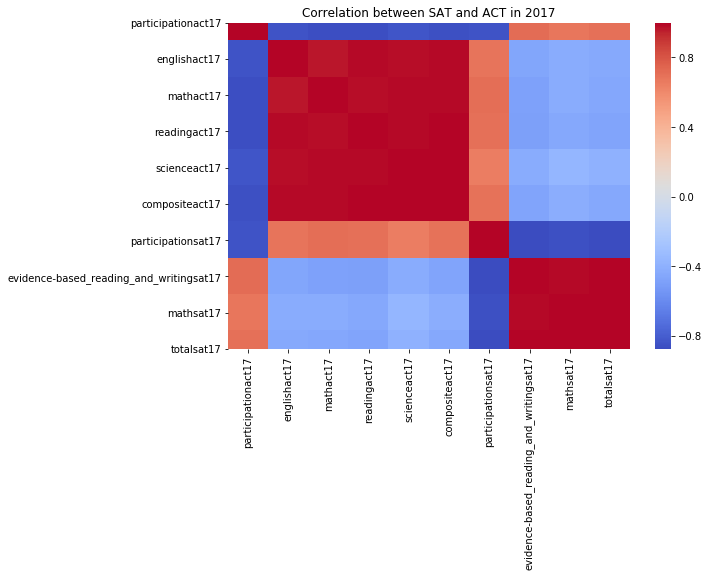

In [122]:
plt.figure(figsize=(9, 6))
sns.heatmap(combined_2017.corr(), cmap = 'coolwarm').set_title('Correlation between SAT and ACT in 2017')





Text(0.5, 1, 'Correlation between SAT and ACT in 2018')

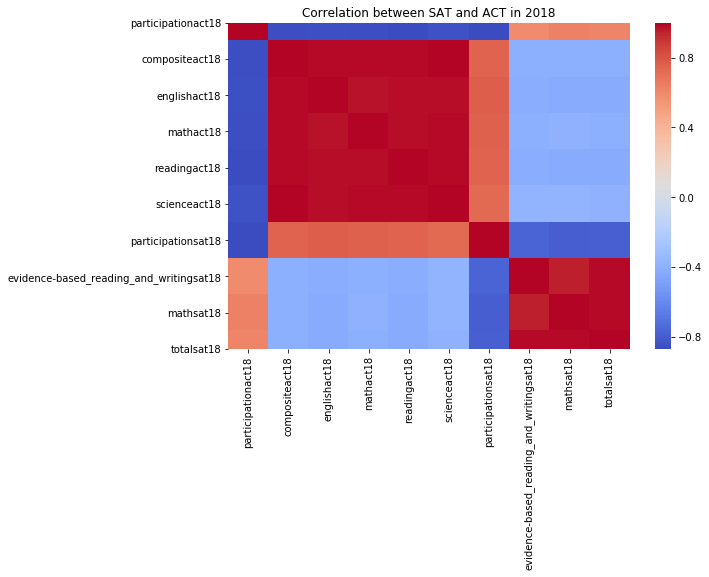

In [123]:
plt.figure(figsize=(9, 6))
sns.heatmap(combined_2018.corr(), cmap = 'coolwarm').set_title('Correlation between SAT and ACT in 2018')

participation in both years has a strong negative correlation to composite

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [124]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2)# You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    #ax[1].plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[list_of_columns[i]])
        #ax[i].gaussian_kde(dataframe[list_of_columns[i]])
        ax[i].set(title=list_of_titles[i], xlabel=list_of_xlabels[i], ylabel = 'Score')
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

#### SAT and ACT 2017 Participation Rate

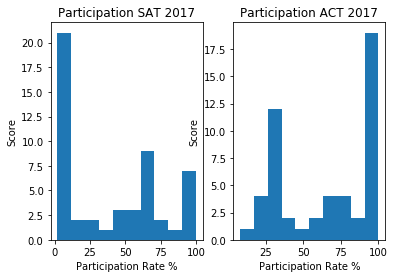

In [125]:
subplot_histograms(combined_2017, ['participationsat17', 'participationact17'],['Participation SAT 2017', 'Participation ACT 2017'], ['Participation Rate %', 'Participation Rate %'])# Code

In [129]:
### plot is misleading. y-axis labels shouldn't be score if this is a histogram, and should be shared across the subplots.
### x axis also have different scales. It should be should be plt.subplots(..., sharex='row',sharey='row') 
### for it to share the x and y axes across subplot rows. Doing this should also prevent the doubled y-axis labels
### score, score from interfering with the plot.

#### Math SAT and ACT 2017 

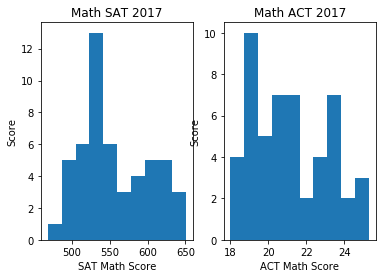

In [130]:
subplot_histograms(combined_2017, ['mathsat17', 'mathact17'],['Math SAT 2017', 'Math ACT 2017'], ['SAT Math Score', 'ACT Math Score'])# Code

#### Reading/Verbal Scores for SAT an ACT 2017

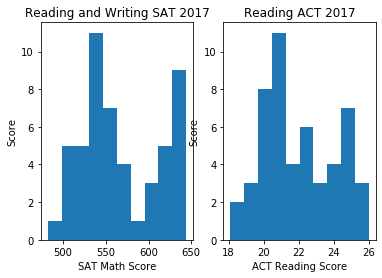

In [131]:
subplot_histograms(combined_2017, ['evidence-based_reading_and_writingsat17', 'readingact17'],['Reading and Writing SAT 2017', 'Reading ACT 2017'], ['SAT Math Score', 'ACT Reading Score'])# Code

In [132]:
### Very confusing plot. Top left says SAT reading and writing but below that it says SAT Math Score. Same problem with 
### histogram count/frequency taken to be a score. 

#### SAT and ACT 2018 Participation Rate

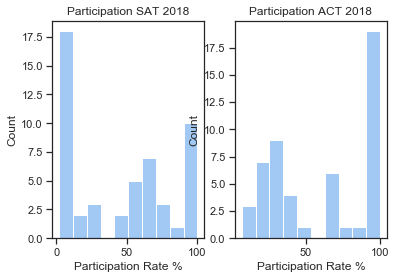

In [94]:
subplot_histograms(combined_2018, ['participationsat18', 'participationact18'],['Participation SAT 2018', 'Participation ACT 2018'], ['Participation Rate %', 'Participation Rate %'])# Code

In [133]:
### Slightly better with regards to axis labels, but scaling issues still present

#### Math SAT and ACT 2018

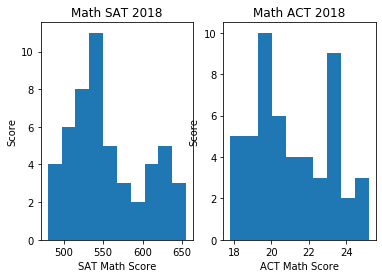

In [134]:
subplot_histograms(combined_2018, ['mathsat18', 'mathact18'],['Math SAT 2018', 'Math ACT 2018'], ['SAT Math Score', 'ACT Math Score'])# Code

#### Reading/Verbal Scores for SAT an ACT 2018

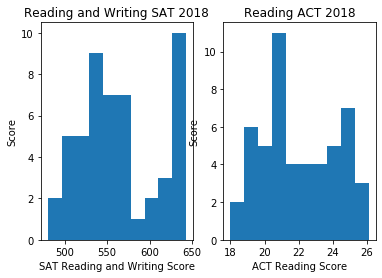

In [135]:
subplot_histograms(combined_2018, ['evidence-based_reading_and_writingsat18', 'readingact18'],['Reading and Writing SAT 2018', 'Reading ACT 2018'], ['SAT Reading and Writing Score', 'ACT Reading Score'])# Code

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


#### SAT ACT Math Scores 2017

Text(0, 0.5, 'ACT Math 2017 Score')

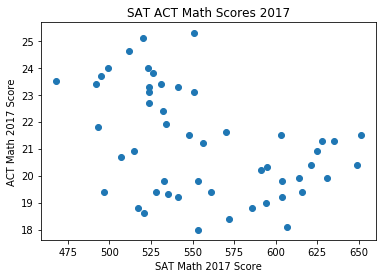

In [136]:
plt.scatter(sat_2017['mathsat17'], act_2017['mathact17'])
plt.title('SAT ACT Math Scores 2017')
plt.xlabel('SAT Math 2017 Score')
plt.ylabel('ACT Math 2017 Score')


#### SAT ACT Verbal/Reading Scores 2017

Text(0, 0.5, 'ACT Reading 2017 Score')

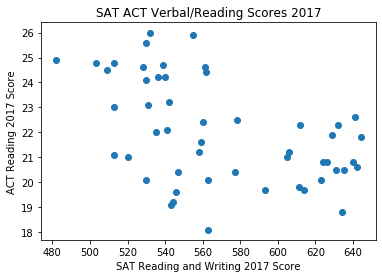

In [137]:
plt.scatter(sat_2017['evidence-based_reading_and_writingsat17'], act_2017['readingact17'])
plt.title('SAT ACT Verbal/Reading Scores 2017')
plt.xlabel('SAT Reading and Writing 2017 Score')
plt.ylabel('ACT Reading 2017 Score')

#### SAT ACT Total/Composite Scores 2017

Text(0, 0.5, 'ACT Composite 2017 Score')

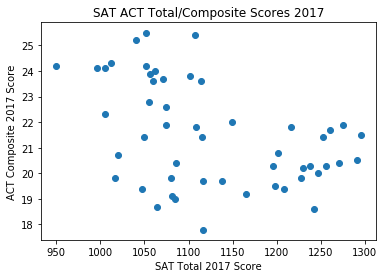

In [138]:
plt.scatter(sat_2017['totalsat17'], act_2017['compositeact17'])
plt.title('SAT ACT Total/Composite Scores 2017')
plt.xlabel('SAT Total 2017 Score')
plt.ylabel('ACT Composite 2017 Score')

#### Total scores for SAT 2017 vs. 2018

Text(0, 0.5, 'SAT Total 2018 Score')

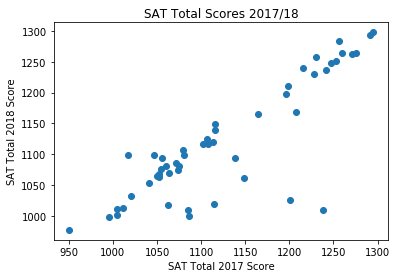

In [139]:
plt.scatter(sat_2017['totalsat17'], sat_2018['totalsat18'])
plt.title('SAT Total Scores 2017/18')
plt.xlabel('SAT Total 2017 Score')
plt.ylabel('SAT Total 2018 Score')

#### Composite scores for ACT 2017 vs. 2018

Text(0, 0.5, 'ACT Composite 2018 Score')

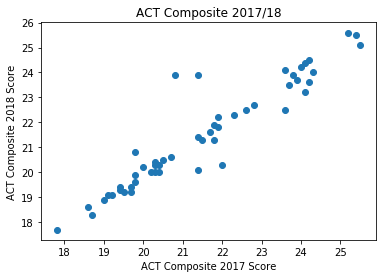

In [140]:
plt.scatter(act_2017['compositeact17'], act_2018_updated['compositeact18'])
plt.title('ACT Composite 2017/18')
plt.xlabel('ACT Composite 2017 Score')
plt.ylabel('ACT Composite 2018 Score')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0, 0.5, 'Scores')

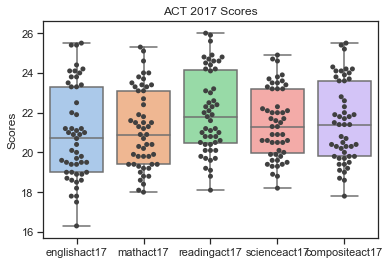

In [141]:
sns.set(style = "ticks", palette = "pastel")
sns.boxplot( data=combined_2017, order = ["englishact17", "mathact17", "readingact17", "scienceact17", "compositeact17"])
sns.swarmplot( data=combined_2017, order = ["englishact17", "mathact17", "readingact17", "scienceact17", "compositeact17"], color = "0.25")
plt.title('ACT 2017 Scores')
plt.ylabel('Scores')         

In [142]:
### Good plot. This is ok since ACT shares the same scaling for all tests.

Text(0, 0.5, 'Scores')

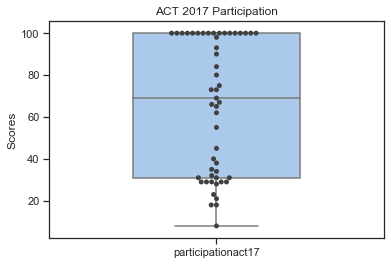

In [143]:
sns.set(style = "ticks", palette = "pastel")
sns.boxplot( data=combined_2017, order = ["participationact17"], width = 0.5)
sns.swarmplot(data=combined_2017, order = ["participationact17"], color = "0.25")
plt.title('ACT 2017 Participation')
plt.ylabel('Scores')

Text(0, 0.5, 'Scores')

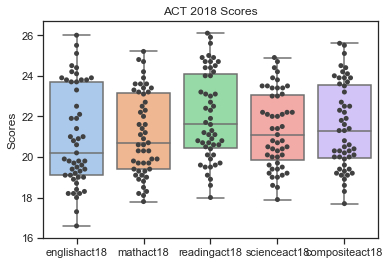

In [144]:
sns.set(style = "ticks", palette = "pastel")
sns.boxplot( data=combined_2018, order = ["englishact18", "mathact18", "readingact18", "scienceact18", "compositeact18"])
sns.swarmplot( data=combined_2018, order = ["englishact18", "mathact18", "readingact18", "scienceact18", "compositeact18"], color = "0.25")
plt.title('ACT 2018 Scores')
plt.ylabel('Scores')

Text(0, 0.5, '%')

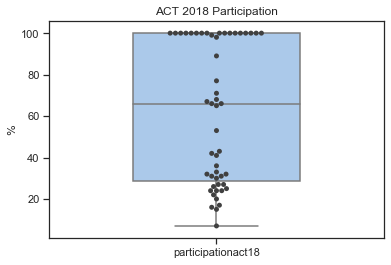

In [145]:
sns.set(style = "ticks", palette = "pastel")
sns.boxplot( data=combined_2018, order = ["participationact18"], width = 0.5)
sns.swarmplot(data=combined_2018, order = ["participationact18"], color = "0.25")
plt.title('ACT 2018 Participation')
plt.ylabel('%')

Text(0, 0.5, 'Scores')

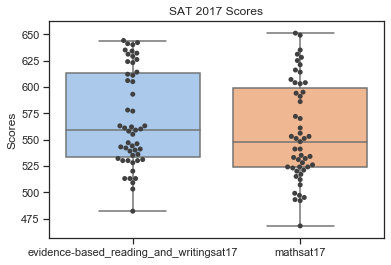

In [146]:
sns.set(style = "ticks", palette = "pastel")
sns.boxplot( data=combined_2017, order = ["evidence-based_reading_and_writingsat17", "mathsat17"])
sns.swarmplot( data=combined_2017, order = ["evidence-based_reading_and_writingsat17", "mathsat17"], color = "0.25")
plt.title('SAT 2017 Scores')
plt.ylabel('Scores')

Text(0, 0.5, 'Scores')

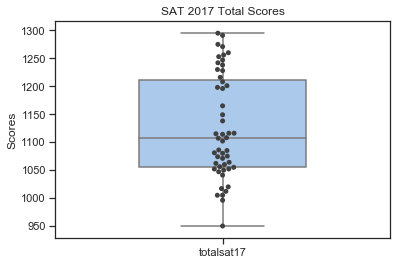

In [147]:
sns.set(style = "ticks", palette = "pastel")
sns.boxplot( data=combined_2017, order = ["totalsat17"], width = 0.50)
sns.swarmplot(data=combined_2017, order = ["totalsat17"], color = "0.25")
plt.title('SAT 2017 Total Scores')
plt.ylabel('Scores')

Text(0, 0.5, '%')

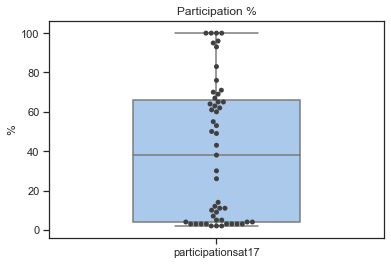

In [148]:
sns.set(style = "ticks", palette = "pastel")
sns.boxplot( data=combined_2017, order = ["participationsat17"], width = 0.5)
sns.swarmplot(data=combined_2017, order = ["participationsat17"], color = "0.25")
plt.title('Participation %')
plt.ylabel('%')

Text(0, 0.5, 'Scores')

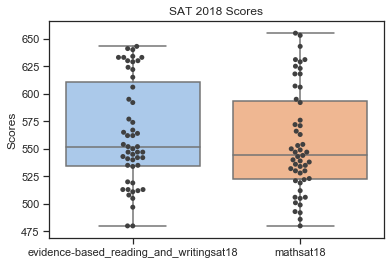

In [149]:
sns.set(style = "ticks", palette = "pastel")
sns.boxplot( data=combined_2018, order = ["evidence-based_reading_and_writingsat18", "mathsat18"])
sns.swarmplot( data=combined_2018, order = ["evidence-based_reading_and_writingsat18", "mathsat18"], color = "0.25")
plt.title('SAT 2018 Scores')
plt.ylabel('Scores')

Text(0, 0.5, 'Scores')

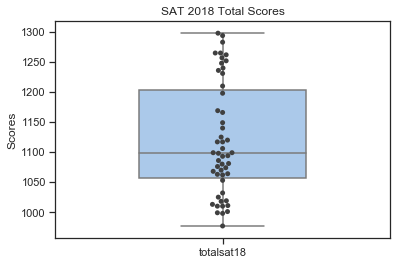

In [150]:
sns.set(style = "ticks", palette = "pastel")
sns.boxplot( data=combined_2018, order = ["totalsat18"], width = 0.5)
sns.swarmplot(data=combined_2018, order = ["totalsat18"], color = "0.25")
plt.title('SAT 2018 Total Scores')
plt.ylabel('Scores')

Text(0, 0.5, '%')

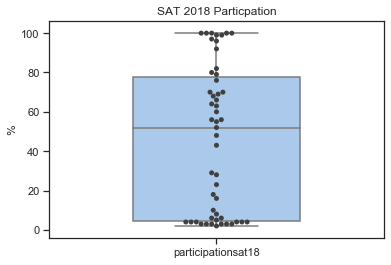

In [151]:
sns.set(style = "ticks", palette = "pastel")
sns.boxplot( data=combined_2018, order = ["participationsat18"], width = 0.5)
sns.swarmplot(data=combined_2018, order = ["participationsat18"], color = "0.25")
plt.title('SAT 2018 Particpation')
plt.ylabel('%')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Text(0, 0.5, 'ACT Math Score')

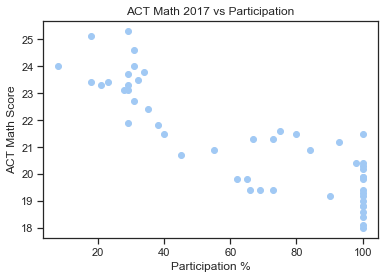

In [152]:
plt.scatter(act_2017['participationact17'],act_2017['mathact17'] )
plt.title('ACT Math 2017 vs Participation')
plt.xlabel('Participation %')
plt.ylabel('ACT Math Score')

**Graph shows a strong negative linear relationship between ACT Math and Participation Rate**

In [165]:
### Might want to do a linear regression to confirm that it's linear and negative. Remember to get rid of the outliers
### identified in the box plots before you do the regression or it'll mess up the slope.

Text(0, 0.5, 'SAT Math Score')

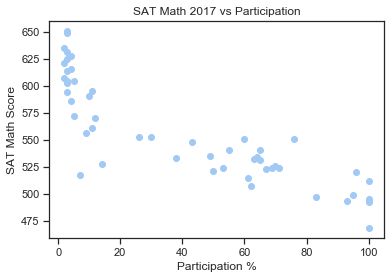

In [166]:
plt.scatter(sat_2017['participationsat17'],sat_2017['mathsat17'] )
plt.title('SAT Math 2017 vs Participation')
plt.xlabel('Participation %')
plt.ylabel('SAT Math Score')

**Graph shows a strong negative linear relationship between SAT Math and Participation Rate**

Text(0, 0.5, 'ACT Reading Score')

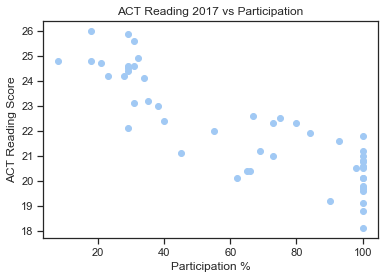

In [167]:
plt.scatter(act_2017['participationact17'],act_2017['readingact17'] )
plt.title('ACT Reading 2017 vs Participation')
plt.xlabel('Participation %')
plt.ylabel('ACT Reading Score')

**Graph shows a strong negative linear relationship between ACT Reading and Participation Rate**

Text(0, 0.5, 'SAT EBRW Score')

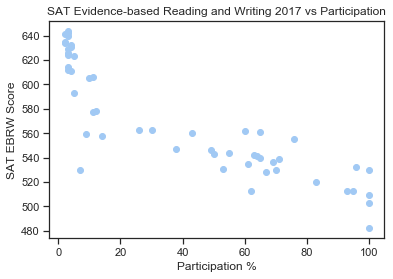

In [168]:
plt.scatter(sat_2017['participationsat17'],sat_2017['evidence-based_reading_and_writingsat17'] )
plt.title('SAT Evidence-based Reading and Writing 2017 vs Participation')
plt.xlabel('Participation %')
plt.ylabel('SAT EBRW Score')

**Graph shows a strong negative linear relationship between SAT Reading and Participation Rate**

Plots confirm that with a higher participation rate, possibly due to comuplsory testing, self selection happens less and the individual average test scores detiorate. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [169]:
# Code to derive the central tendency (mean, median, mode), spread(varriance), shape/skewness (kurtosis and skew)
def get_stats(data_frame): 
    for column in data_frame.columns:
        if column != 'State':
            kurtosis = sc.stats.kurtosis(data_frame[column])
            skewness = sc.stats.skew(data_frame[column])
            var = np.var(data_frame[column])
            mean = np.mean(data_frame[column])
            mode = sc.stats.mode(data_frame[column])
            median = np.mean(data_frame[column])
            print(f'The Kurtosis of {column} is {kurtosis}')
            print(f'The Skewness of {column} is {skewness}')
            print(f'The Varriance of {column} is {var}')
            print(f'The Mean of {column} is {mean}')
            print(f'The Mode of {column} is {mode[1]}')
            print(f'The Median of {column} is {median}')

In [170]:
get_stats(combined_2017)
get_stats(combined_2018)

The Kurtosis of participationact17 is -1.5916901032787911
The Skewness of participationact17 is -0.19211796242279808
The Varriance of participationact17 is 1012.7781622452906
The Mean of participationact17 is 65.25490196078431
The Mode of participationact17 is [17]
The Median of participationact17 is 65.25490196078431
The Kurtosis of englishact17 is -0.9108196437488862
The Skewness of englishact17 is 0.34220217359811805
The Varriance of englishact17 is 5.431172625913109
The Mean of englishact17 is 20.931372549019606
The Mode of englishact17 is [3]
The Median of englishact17 is 20.931372549019606
The Kurtosis of mathact17 is -1.0011927796225994
The Skewness of mathact17 is 0.3228174361152988
The Varriance of mathact17 is 3.8512572087658596
The Mean of mathact17 is 21.182352941176468
The Mode of mathact17 is [4]
The Median of mathact17 is 21.182352941176468
The Kurtosis of readingact17 is -1.0038016291000136
The Skewness of readingact17 is 0.2613779187300745
The Varriance of readingact17

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Yes and No. For example, the **participation rates** are heavily skewed to the right and left (fat tails) at 0 and 100% rates for both ACT and SAT, and have low kurtosis. This could possibly be due to in-state testing requirements, which prevents the distribution from assuming a normal distribution. So I performed tests for normality..

Does This Assumption Hold for:

At the 5% level of significance:

    - Math -  No
    - Reading - Only ACT Reading in 2017
              - Only SAT Evidence-Based Reading and Writing in 2018.
    - Participation Rates - No
    - Science - only ACT Science 2017. 

The rest, baring participation, kinda follows a normal distribution, but we must allow for a slightly higher level of signficance.

Particiaption seems to be the furthest from normal distribution, with the lowest test statistic.


Explain your answers for each distribution and how you think this will affect estimates made from these data.

The individual test components are taken across all states, with and without mandatory in state testing requriements, and has a large sample size. Overall estimates made from these data **can likely negate the impact of skew from mandatory testing schemes (from self selection and state testing requirements)** and thus individual test scores and their inferences are likely to follow a normal distribution. Estimates made are likely to be accurate.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actual populations these data describe in answering this question)*

Answer: Not really.

**Aggregation**: Participation rates have shown to be highly skewed towards the 0 and 100% rate of participation. 

This is as so as states can have different high school graduation requirements. 

So if one state requires students to take the ACT, they will end up not taking the SAT, or have a correspondingly low population that takes the SAT.

For example, in 2017, states that require ACT: Alabama, Arkansas, Kentucky, Louisiana, Mississipi, Montana, Oklahomna, South Carolina, Tennessee all have a 100% ACT participation rate but only have a corresponding < 10% SAT participation rate.

Therefore, states with a lower participation rate in a exam due to mandatory requirements for the other exam will mean that students of higher ability can self select themselves into taking the other exam and it will lead to a higher respective score.

**Granularity**:We cannot just take the participation rates per state and compare them vis a vis as there are different weightages for each state, owing to their different population sizes. We must find the weighted mean participation rate that is adjusted according to different population  size. For example, California has a higher population size and a higher weight should be given to it to find the true US weighted SAT participation rate

Data only shows 2 years of data, and specifically, after the important SAT changes in assessment in 2016, candidates may self select themselves into taking/not taking SAT from 2016 onwards, and it is not reasonable to form any inference on any relationship between SAT/ACT participation rates and their test scores.  



In [161]:
### Excellent. Could have plotted KDE of participation histogram to show that it is multi-modal.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

 

Answer: SAT and ACT may have different methodologies of grading; different bell curves, so it is not possible to compare their respective distributions and quartiles.

States have different testing requriements as part of graduation crietria and may be biased according to the main accepted test score that in- state universities accept, given that most students apply to in- state universities. So for example, states with high participation rates are only so as that test is mandatory, and usually exhibit high enough sample size to **apply central limit theorem and assume a normal distribution of scores only within those specific states.**

However, states with lower participation rates mean that candidates force themselves to take tests to apply for other colleges out of state and that is not part of graduation requirements. This self selection could mean that smarter students take the additional tests they need and thus samples are likely to be left skewed in terms of scores and sample sizes are also too small to apply central limit theorem.

Also, given that the SAT methodology has changed in 2016, students may self select themselves to take SAT, further impacting the skew of SAT.

This is supported as the data states that Math SAT 2018 has a skew of 0.51467 vs 0.35421 in 2017. 

**The above analysis does not account for the variance and populations in states, the average of state scores does not tell us very much about what a histogram of the entire US SAT Math Score would look like.**

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [162]:
# Shapiro-Wilk Test - test for normality
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

def shapiro_test(data_frame):
    # seed the random number generator
    seed(1)
    for column in data_frame.columns:
        if column != 'State':
            data = data_frame[column]
            # normality test
            stat, p = shapiro(data)
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            # interpret
            alpha = 0.05
            if p > alpha:
                print(f'{column} looks Gaussian (fail to reject H0)')
            else:
                print(f'{column} does not look Gaussian (reject H0)')

In [163]:
shapiro_test(combined_2017)

Statistics=0.840, p=0.000
participationact17 does not look Gaussian (reject H0)
Statistics=0.949, p=0.028
englishact17 does not look Gaussian (reject H0)
Statistics=0.953, p=0.041
mathact17 does not look Gaussian (reject H0)
Statistics=0.956, p=0.054
readingact17 looks Gaussian (fail to reject H0)
Statistics=0.963, p=0.114
scienceact17 looks Gaussian (fail to reject H0)
Statistics=0.950, p=0.031
compositeact17 does not look Gaussian (reject H0)
Statistics=0.854, p=0.000
participationsat17 does not look Gaussian (reject H0)
Statistics=0.921, p=0.002
evidence-based_reading_and_writingsat17 does not look Gaussian (reject H0)
Statistics=0.949, p=0.030
mathsat17 does not look Gaussian (reject H0)
Statistics=0.936, p=0.008
totalsat17 does not look Gaussian (reject H0)


In [164]:
shapiro_test(combined_2018)

Statistics=0.826, p=0.000
participationact18 does not look Gaussian (reject H0)
Statistics=0.950, p=0.030
compositeact18 does not look Gaussian (reject H0)
Statistics=0.934, p=0.007
englishact18 does not look Gaussian (reject H0)
Statistics=0.951, p=0.034
mathact18 does not look Gaussian (reject H0)
Statistics=0.953, p=0.042
readingact18 does not look Gaussian (reject H0)
Statistics=0.958, p=0.067
scienceact18 looks Gaussian (fail to reject H0)
Statistics=0.856, p=0.000
participationsat18 does not look Gaussian (reject H0)
Statistics=0.927, p=0.004
evidence-based_reading_and_writingsat18 does not look Gaussian (reject H0)
Statistics=0.937, p=0.010
mathsat18 does not look Gaussian (reject H0)
Statistics=0.921, p=0.002
totalsat18 does not look Gaussian (reject H0)


## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

1) **California** - California's ACT participation rate has continuously fallen across the decade and has reached a decade low of 27% in 2018. While the participation rate has fallen, composite scores have remained nearly the same throughout the years at 22.8 (2017) and 22.7 (2018). This renders our previous theory that self-selection leads to a positive bias in scores moot. While California currently has the largest projected student population, lawyers representing several of CA's school districts have been threatening to sue the University of California if the system doesn't stop requiring SAT and ACT scores in admission decisions. 

*Critics of the standardized tests say test performance is closely correlated with — and therefore likely influenced by — family incomes, parent education levels and race. They argue that using the tests for college admissions discriminates against disadvantaged students, including students of color, poor students and students with disabilities*

Source https://www.sandiegouniontribune.com/news/education/story/2019-10-31/act-scores

2) **Idaho** - Idaho has a instate testing requirement that forces high school juniors to take the test at taxpayers expense. This explains a high participation rate. However, Idaho's scores are highest in the 8 US States that require mandatory SAT testing. It was suspected that other variables such as students' advanced courseloads and extracurriculars would have cut into SAT prep time. Moreover, given that the SAT was administered for free, students may not have taken the exam seriously. The data has shown that the mandatory testing requirement, only introudced recently, has not led to a detioration in test scores.

*Laraway wants to look at several variables — such as students’ advanced courseloads and extracurricular activities, which could have cut into SAT prep time.
And she’s also not sure this year’s juniors took the test as seriously as their predecessors. She notes that students who chose to take the SAT on a Saturday scored significantly better than the juniors who took part in SAT Day.
Coeur d’Alene has seen similar results, largely because of repetition. Students who take the test several times tend to do better.*

Source https://www.idahoednews.org/news/idahos-sat-struggles-in-districts-large-and-small/

3) **Oklahoma**- Oklahoma has the lowest SAT score for a non-mandatory state. Its participation rate is only at 8% in 2018 but its total score of 1047 falls below the 25% nationwide quartile range in 2017. **This goes against the theory that mandatory testing results in lower scores.** Oklahoma does not have have a statewide mandate to prepare for either test and such a low score could be due to student preparedness. Moreover, it is known in the US that Oklahoma has a lower income distribution so parents may not have the resources to prepare their kids for the SATs. More data on these attributes are henceforth required.

*The lowest SAT score for a non-mandatory state is 963 in Oklahoma. This is unusual for a state where 22% of graduating seniors take the SAT. For comparison, Nevada (20% participation), Ohio (19% participation), and New Mexico (18% participation) all have average SAT scores of 1070 or above. By contrast, while in Oklahoma a particular school district chooses to administer either the SAT or ACT, there's no statewide mandate to spend time in classrooms prepping for the SAT specifically.*

Source https://blog.prepscholar.com/average-sat-scores-by-state-most-recent



## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Based on exploration of the data and other news events, in an era of declining need for SAT or ACT for admissions, the only way for collegeboard to increase the participation rate is to convince state lawmakers for the state to participate in the SAT Assessment day where SAT testing replaces some component of specific compulsory in state assessment (example PSAT for New Mexico) and to target states that have a growing population, again, this are usually states with a large population (New Mexico, California, Texas) and benefits from a large migrant population from Latin America.

**Choice: California, due to it's sheer population size and current high participation rate that makes it easier to legislate mandatory testing (i.e. capture the additional 30 or so % in participation, which isn so far off and easier to get the state's support but has the high population mass to support a increase in aggregate numbers)**

It must also be noted that there are certain factors that affects the participation rate for a state that I currently do not have access to information for:

1) The percentage of universities in-state that require SAT testing (most high school seniors apply to in state colleges and this is a important component to nudge education lawmakers)

2) Whether state budgets allow for tax-payer funding of SATs when their usefulness has been increasingly questioned.

3) The size of the state population, untapped population to be captured if mandatory testing was legislated.

4) Whether state funding for schools depends on how well they have performed on SAT testing, schools that are ranked on SAT outcomes will try to do better for it to get more state funding and lawmakers will be more amicable to mandatory state wide testing. 